# Fandango Movie Ratings
## DataQuest Project

In 2015 a journalist noticed that the movie ratings displayed on the movie rating site Fandango were very often higher than on similar websites such as IMDb. This was (in part) due to a bug, which the Fandango team said they would fix. 

We'll be comparing the original dataset with movies from 2014 and 2015 against a dataset with movies from 2016 and 2017 to determine whether the issue has been resolved.

### Data
[2014/2015](https://github.com/fivethirtyeight/data/tree/master/fandango)  
[2016/2017](https://github.com/mircealex/Movie_ratings_2016_17)

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange

In [3]:
old = pd.read_csv("fandango_score_comparison.csv")
recent = pd.read_csv("movie_ratings_16_17.csv")

In [4]:
old = old[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
recent = recent[['movie', 'year', 'fandango']]

### Data exploration

In [10]:
old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
recent.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


### Data cleaning

For this analysis we're interested in movies from the years 2015 and 2016. 

In [5]:
movies2015 = old.loc[old['FILM'].str.contains("2015"),:]
movies2016 = recent.loc[recent['year'] == 2016,:]

The description of the 2014/2015 dataset tells us that the sample is unlikely to be representative of the population. The description states that:

```
fandango_score_comparison.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.
```

As not all movies will have 30+ fan reviews, not all movies had an equal chance to be included. The same is true for the 2016/2017 dataset, for which the description reads:

```
movie_ratings_16_17.csv contains movie ratings data for 214 of the most popular movies (with a significant number of votes)
```

Since it's not possible to recollect the data ourselves, as this data is no longer publicly available, we'll adjust the goal of this analysis to focus on Fandango's rating of popular movies between the two timeperiods. Popular here is defined according to the original dataset, meaning movies with 30+ fan ratings on the Fandango website.

The movie with the fewest user votes in 2015 had 35 votes, which means that all the movies in the dataset meet our threshhold for popular movies.

In [5]:
movies2015['Fandango_votes'].describe()

count      129.000000
mean      3761.891473
std       6543.601748
min         35.000000
25%        210.000000
50%       1415.000000
75%       4045.000000
max      34846.000000
Name: Fandango_votes, dtype: float64

The 2016 dataset doesn't contain a column indicating how many user reviews there were. In addition, the Fandango website has changed and now (April 2020) displays reviews from other sites, such as RottenTomatoes. We can thus not know whether the movies met the threshhold of 30 user reviews. 

The only way forward with this dataset is to check a random sample and see how many user reviews there were on RottenTomatoes as a proxy.

The movie with the fewest user reviews in our sample is Mechanic: Resurrection with 57 user reviews, which is still well above our threshhold.

In [6]:
movies2016.sample(n=10)

,movie,year,fandango
37,Come and Find Me,2016,4.0
36,Collide,2016,3.5
142,Shut In,2016,3.0
71,Hunt for the Wilderpeople,2016,4.5
107,Me Before You,2016,4.5
81,Jack Reacher: Never Go Back,2016,4.0
63,Gods of Egypt,2016,3.5
199,The Wild Life,2016,3.0
68,Hell or High Water,2016,4.5
62,Ghostbusters,2016,4.0


### Data analysis

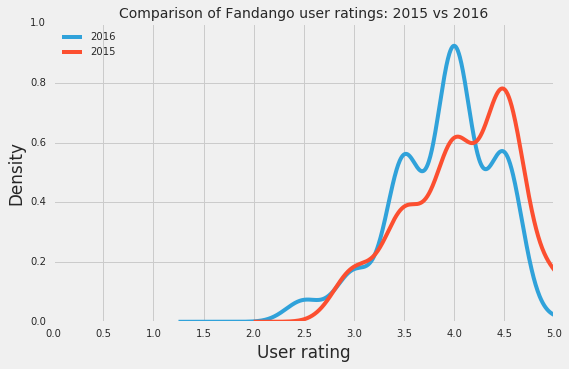

In [7]:
plt.style.use('fivethirtyeight')
plt.xticks(arange(0,5.1,0.5))
plt.title("Comparison of Fandango user ratings: 2015 vs 2016", fontsize=14)
movies2016['fandango'].plot.kde(label="2016")
movies2015['Fandango_Stars'].plot.kde(label="2015", figsize=(8,5))
plt.xlabel("User rating")
plt.xlim(0,5)
plt.legend(loc='upper left')
plt.show()


The KDE plot shows that the ratings for movies in 2016 are less positive, compared to 2015. The lowest rating is 2.5 in 2016, whereas it was 3.0 in 2015. Additionally the density for 4.5 and 5.0 ratings is higher for 2015. 2016 has seen a shift to 4.0. 

Showing the data side by side percentage wise displays similar results.

In [11]:
vcn2015 = pd.Series(movies2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100)
vcn2016 = pd.Series(movies2016['fandango'].value_counts(normalize=True).sort_index() * 100)
vcn = pd.DataFrame([vcn2015,vcn2016]).T
vcn.columns = [2015,2016]

In [12]:
vcn

,2015,2016
2.5,NaN,3.141361
3.0,8.527132,7.329843
3.5,17.829457,24.083770
4.0,28.682171,40.314136
4.5,37.984496,24.607330
5.0,6.976744,0.523560


In [13]:
mean2015 = movies2015['Fandango_Stars'].mean()
median2015 = movies2015['Fandango_Stars'].median()
mode2015 = movies2015['Fandango_Stars'].mode()[0]
mean2016 = movies2016['fandango'].mean()
median2016 = movies2016['fandango'].median()
mode2016 = movies2016['fandango'].mode()[0]

In [14]:
stats2015 = pd.Series([mean2015,median2015,mode2015],index = ['mean','median','mode'])
stats2016 = pd.Series([mean2016,median2016,mode2016],index = ['mean','median','mode'])
stats = pd.DataFrame([stats2015,stats2016]).T
stats.columns = [2015,2016]

In [15]:
stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


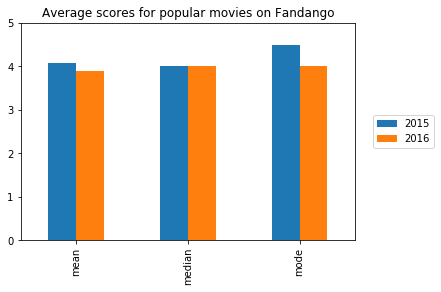

In [29]:
stats.plot.bar()
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.title("Average scores for popular movies on Fandango")
plt.ylim(0,5)
plt.show()

### Conclusion

We set out to determine whether the Fandango movie ratings had become less positive for popular movies after Fandango fixed their rating bug. While the ratings have on average indeed gone down slightly, it should be noted that in the old situation Fandango made use of their own rating system, whereas in the new situation they are displaying RottenTomatoes ratings on their own website.